**#Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

**#importing Datasets**

In [2]:
d1 = pd.read_csv('Dataset/train.csv')
d2 = pd.read_csv('Dataset/test.csv')

df = pd.concat([d1,d2])

df.head()

ID    Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328.0  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621.0  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467.0     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607.0   862         FORD   Escape        2011       Jeep   
4  45809263  11726.0   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1     Tiptronic          4x4  04-May        Left wheel   Black        8  
2      Variator        Front  04-May  Right-hand drive   Black        2  
3     Automatic          4x4  04-May        Left wheel   White        0  
4     Automatic        Front  04-May        Left wheel  Silver        4

**#id is not required from the dataset so removing that**

In [3]:
df = df.drop('ID',axis=1)
df.head()

Price  Levy Manufacturer    Model  Prod. year   Category  \
0  13328.0  1399        LEXUS   RX 450        2010       Jeep   
1  16621.0  1018    CHEVROLET  Equinox        2011       Jeep   
2   8467.0     -        HONDA      FIT        2006  Hatchback   
3   3607.0   862         FORD   Escape        2011       Jeep   
4  11726.0   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1     Tiptronic          4x4  04-May        Left wheel   Black        8  
2      Variator        Front  04-May  Right-hand drive   Black        2  
3     Automatic          4x4  04-May        Left wheel   White        0  
4     Automatic        Front  04-May        Left wheel  Silver        4

**Data insights from the Dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27482 entries, 0 to 8244
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  float64
 1   Levy              27482 non-null  object 
 2   Manufacturer      27482 non-null  object 
 3   Model             27482 non-null  object 
 4   Prod. year        27482 non-null  int64  
 5   Category          27482 non-null  object 
 6   Leather interior  27482 non-null  object 
 7   Fuel type         27482 non-null  object 
 8   Engine volume     27482 non-null  object 
 9   Mileage           27482 non-null  object 
 10  Cylinders         27482 non-null  float64
 11  Gear box type     27482 non-null  object 
 12  Drive wheels      27482 non-null  object 
 13  Doors             27482 non-null  object 
 14  Wheel             27482 non-null  object 
 15  Color             27482 non-null  object 
 16  Airbags           27482 non-null  int64  

In [5]:
df.describe()

#price will be our target

Price    Prod. year     Cylinders       Airbags
count  1.923700e+04  27482.000000  27482.000000  27482.000000
mean   1.855593e+04   2010.912452      4.593734      6.563569
std    1.905813e+05      5.632865      1.413918      4.329256
min    1.000000e+00   1939.000000      1.000000      0.000000
25%    5.331000e+03   2009.000000      4.000000      4.000000
50%    1.317200e+04   2012.000000      4.000000      6.000000
75%    2.207500e+04   2015.000000      4.000000     12.000000
max    2.630750e+07   2020.000000    127.000000     16.000000

In [6]:
#check for nulls
df.isnull().sum()

Price               8245
Levy                   0
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

**null values are there in Price, filling null values by Mean**

In [7]:
df['Price'] = df['Price'].fillna(df['Price'].mean())  #treating null values

In [8]:
df.isnull().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [9]:
df.value_counts('Manufacturer')

Manufacturer
HYUNDAI          5358
TOYOTA           5177
MERCEDES-BENZ    2983
FORD             1592
CHEVROLET        1520
                 ... 
LAMBORGHINI         1
LANCIA              1
MG                  1
FOTON               1
PONTIAC             1
Length: 68, dtype: int64

In [10]:
df.value_counts('Doors')

Doors
04-May    26173
02-Mar     1129
>5          180
dtype: int64

In [11]:
#mileage has data in form of 1330000 km, removing the last three char i.e space k and m to make it a numerical data.

df['Mileage'] = df['Mileage'].str[:-3]

In [12]:
df['Levy'].value_counts()

-       8273
765      708
891      665
640      582
639      575
        ... 
2308       1
1366       1
2562       1
1519       1
424        1
Name: Levy, Length: 635, dtype: int64

In [13]:
df['Levy']=df['Levy'].replace('-',np.nan)

In [14]:
df['Levy'].value_counts()

765     708
891     665
640     582
639     575
1017    430
       ... 
1366      1
2562      1
1836      1
1040      1
997       1
Name: Levy, Length: 634, dtype: int64

In [15]:
#replacing '-' with 0, Dropping null values in Levy i.e. around 8273

In [42]:
data = df[df['Levy']!=0]
data  = df.dropna()

In [43]:
##creating csv of data file and just taking 10000 samples

In [44]:
data.to_csv('final.csv')

In [45]:
##loading new csv##

In [46]:
data = pd.read_csv('final.csv',index_col = 0, nrows=1000)

In [47]:
data.head()

Price  Levy Manufacturer     Model  Prod. year   Category  \
0  13328.0  1399        LEXUS    RX 450        2010       Jeep   
1  16621.0  1018    CHEVROLET   Equinox        2011       Jeep   
3   3607.0   862         FORD    Escape        2011       Jeep   
4  11726.0   446        HONDA       FIT        2014  Hatchback   
5  39493.0   891      HYUNDAI  Santa FE        2016       Jeep   

  Leather interior Fuel type Engine volume  Mileage  Cylinders Gear box type  \
0              Yes    Hybrid           3.5   186005        6.0     Automatic   
1               No    Petrol             3   192000        6.0     Tiptronic   
3              Yes    Hybrid           2.5   168966        4.0     Automatic   
4              Yes    Petrol           1.3    91901        4.0     Automatic   
5              Yes    Diesel             2   160931        4.0     Automatic   

  Drive wheels   Doors       Wheel   Color  Airbags  
0          4x4  04-May  Left wheel  Silver       12  
1          4x4  04-May  Left wheel   Black        8  
3          4x4  04-May  Left wheel   White        0  
4        Front  04-May  Left wheel  Silver        4  
5        Front  04-May  Left wheel   White        4

In [48]:
data.nunique()

Price               448
Levy                225
Manufacturer         30
Model               205
Prod. year           21
Category             10
Leather interior      2
Fuel type             5
Engine volume        53
Mileage             828
Cylinders             8
Gear box type         4
Drive wheels          3
Doors                 3
Wheel                 2
Color                14
Airbags              12
dtype: int64

In [49]:
data.dtypes

Price               float64
Levy                  int64
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage               int64
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

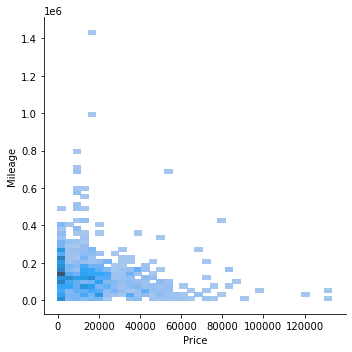

In [50]:
sns.displot(data, x = 'Price', y = 'Mileage')

<AxesSubplot:>

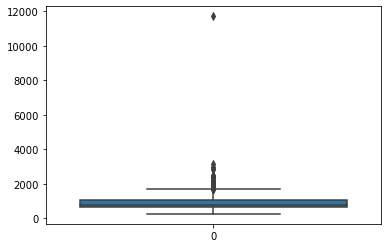

In [51]:
sns.boxplot(data['Levy'])

<AxesSubplot:>

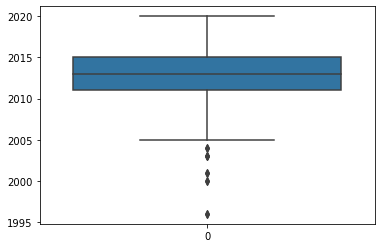

In [52]:
sns.boxplot(data['Prod. year'])

<AxesSubplot:>

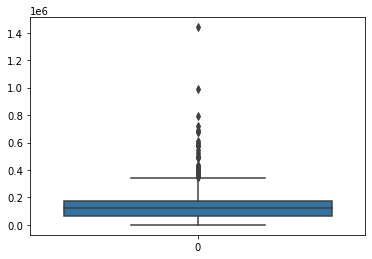

In [53]:
sns.boxplot(data['Mileage'])

<AxesSubplot:>

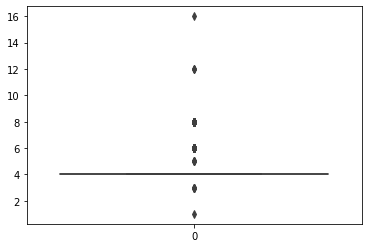

In [54]:
sns.boxplot(data['Cylinders'])

In [56]:
##Applyin LabelEncoder acroos categorical variables
from sklearn.preprocessing import LabelEncoder

In [57]:
data[['Manufacturer', 'Model', 'Category','Leather interior','Fuel type','Engine volume','Gear box type','Drive wheels','Doors','Wheel','Color']] = data[['Manufacturer', 'Model', 'Category','Leather interior','Fuel type','Engine volume','Gear box type','Drive wheels','Doors','Wheel','Color']].apply(LabelEncoder().fit_transform)

In [58]:
data.head()

Price  Levy  Manufacturer  Model  Prod. year  Category  Leather interior  \
0  13328.0  1399            17    163        2010         4                 1   
1  16621.0  1018             3     85        2011         4                 0   
3   3607.0   862             9     86        2011         4                 1   
4  11726.0   446            11     88        2014         3                 1   
5  39493.0   891            12    169        2016         4                 1   

   Fuel type  Engine volume  Mileage  Cylinders  Gear box type  Drive wheels  \
0          1             36   186005        6.0              0             0   
1          3             31   192000        6.0              2             0   
3          1             27   168966        4.0              0             0   
4          3              6    91901        4.0              0             1   
5          0             19   160931        4.0              0             1   

   Doors  Wheel  Color  Airbags  
0      1      0     10       12  
1      1      0      1        8  
3      1      0     12        0  
4      1      0     10        4  
5      1      0     12        4

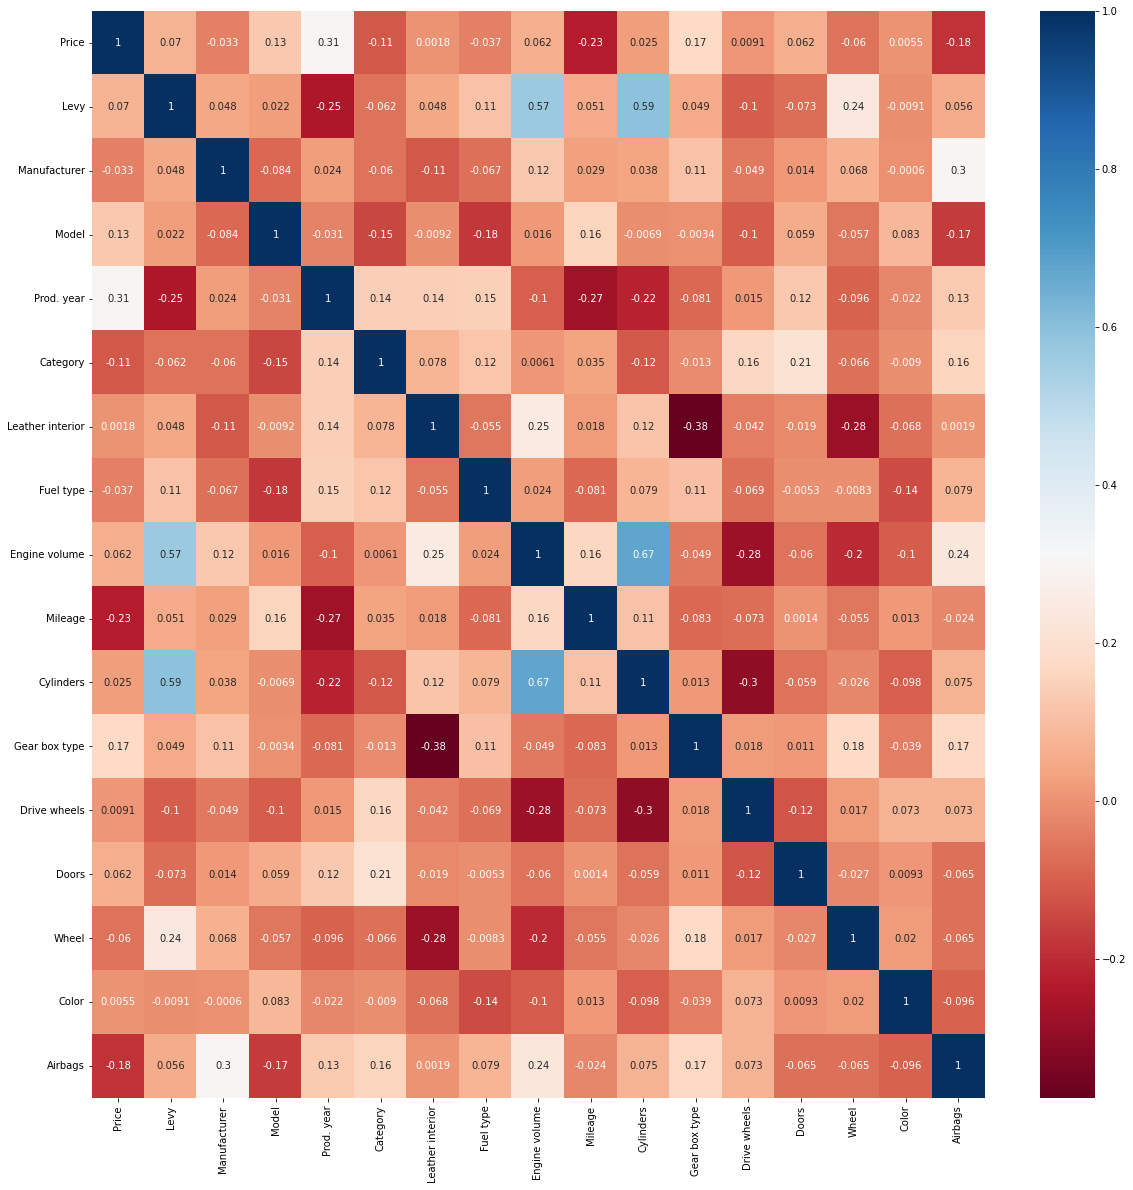

In [59]:
    plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, cmap = 'RdBu')
plt.show()

In [60]:
#from the above we can see that leather interrior and gearbox type are highly negatively correlated, removing leather interior from the dataset also drive wheel as it is hightly negative correlated with few.

data = data.drop(['Drive wheels','Leather interior'], axis=1)

In [61]:
data.head()

Price  Levy  Manufacturer  Model  Prod. year  Category  Fuel type  \
0  13328.0  1399            17    163        2010         4          1   
1  16621.0  1018             3     85        2011         4          3   
3   3607.0   862             9     86        2011         4          1   
4  11726.0   446            11     88        2014         3          3   
5  39493.0   891            12    169        2016         4          0   

   Engine volume  Mileage  Cylinders  Gear box type  Doors  Wheel  Color  \
0             36   186005        6.0              0      1      0     10   
1             31   192000        6.0              2      1      0      1   
3             27   168966        4.0              0      1      0     12   
4              6    91901        4.0              0      1      0     10   
5             19   160931        4.0              0      1      0     12   

   Airbags  
0       12  
1        8  
3        0  
4        4  
5        4

<ipython-input-62-40c10e8c4001>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)


<AxesSubplot:ylabel='Density'>

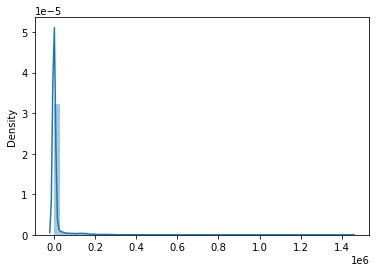

In [62]:
sns.distplot(data)

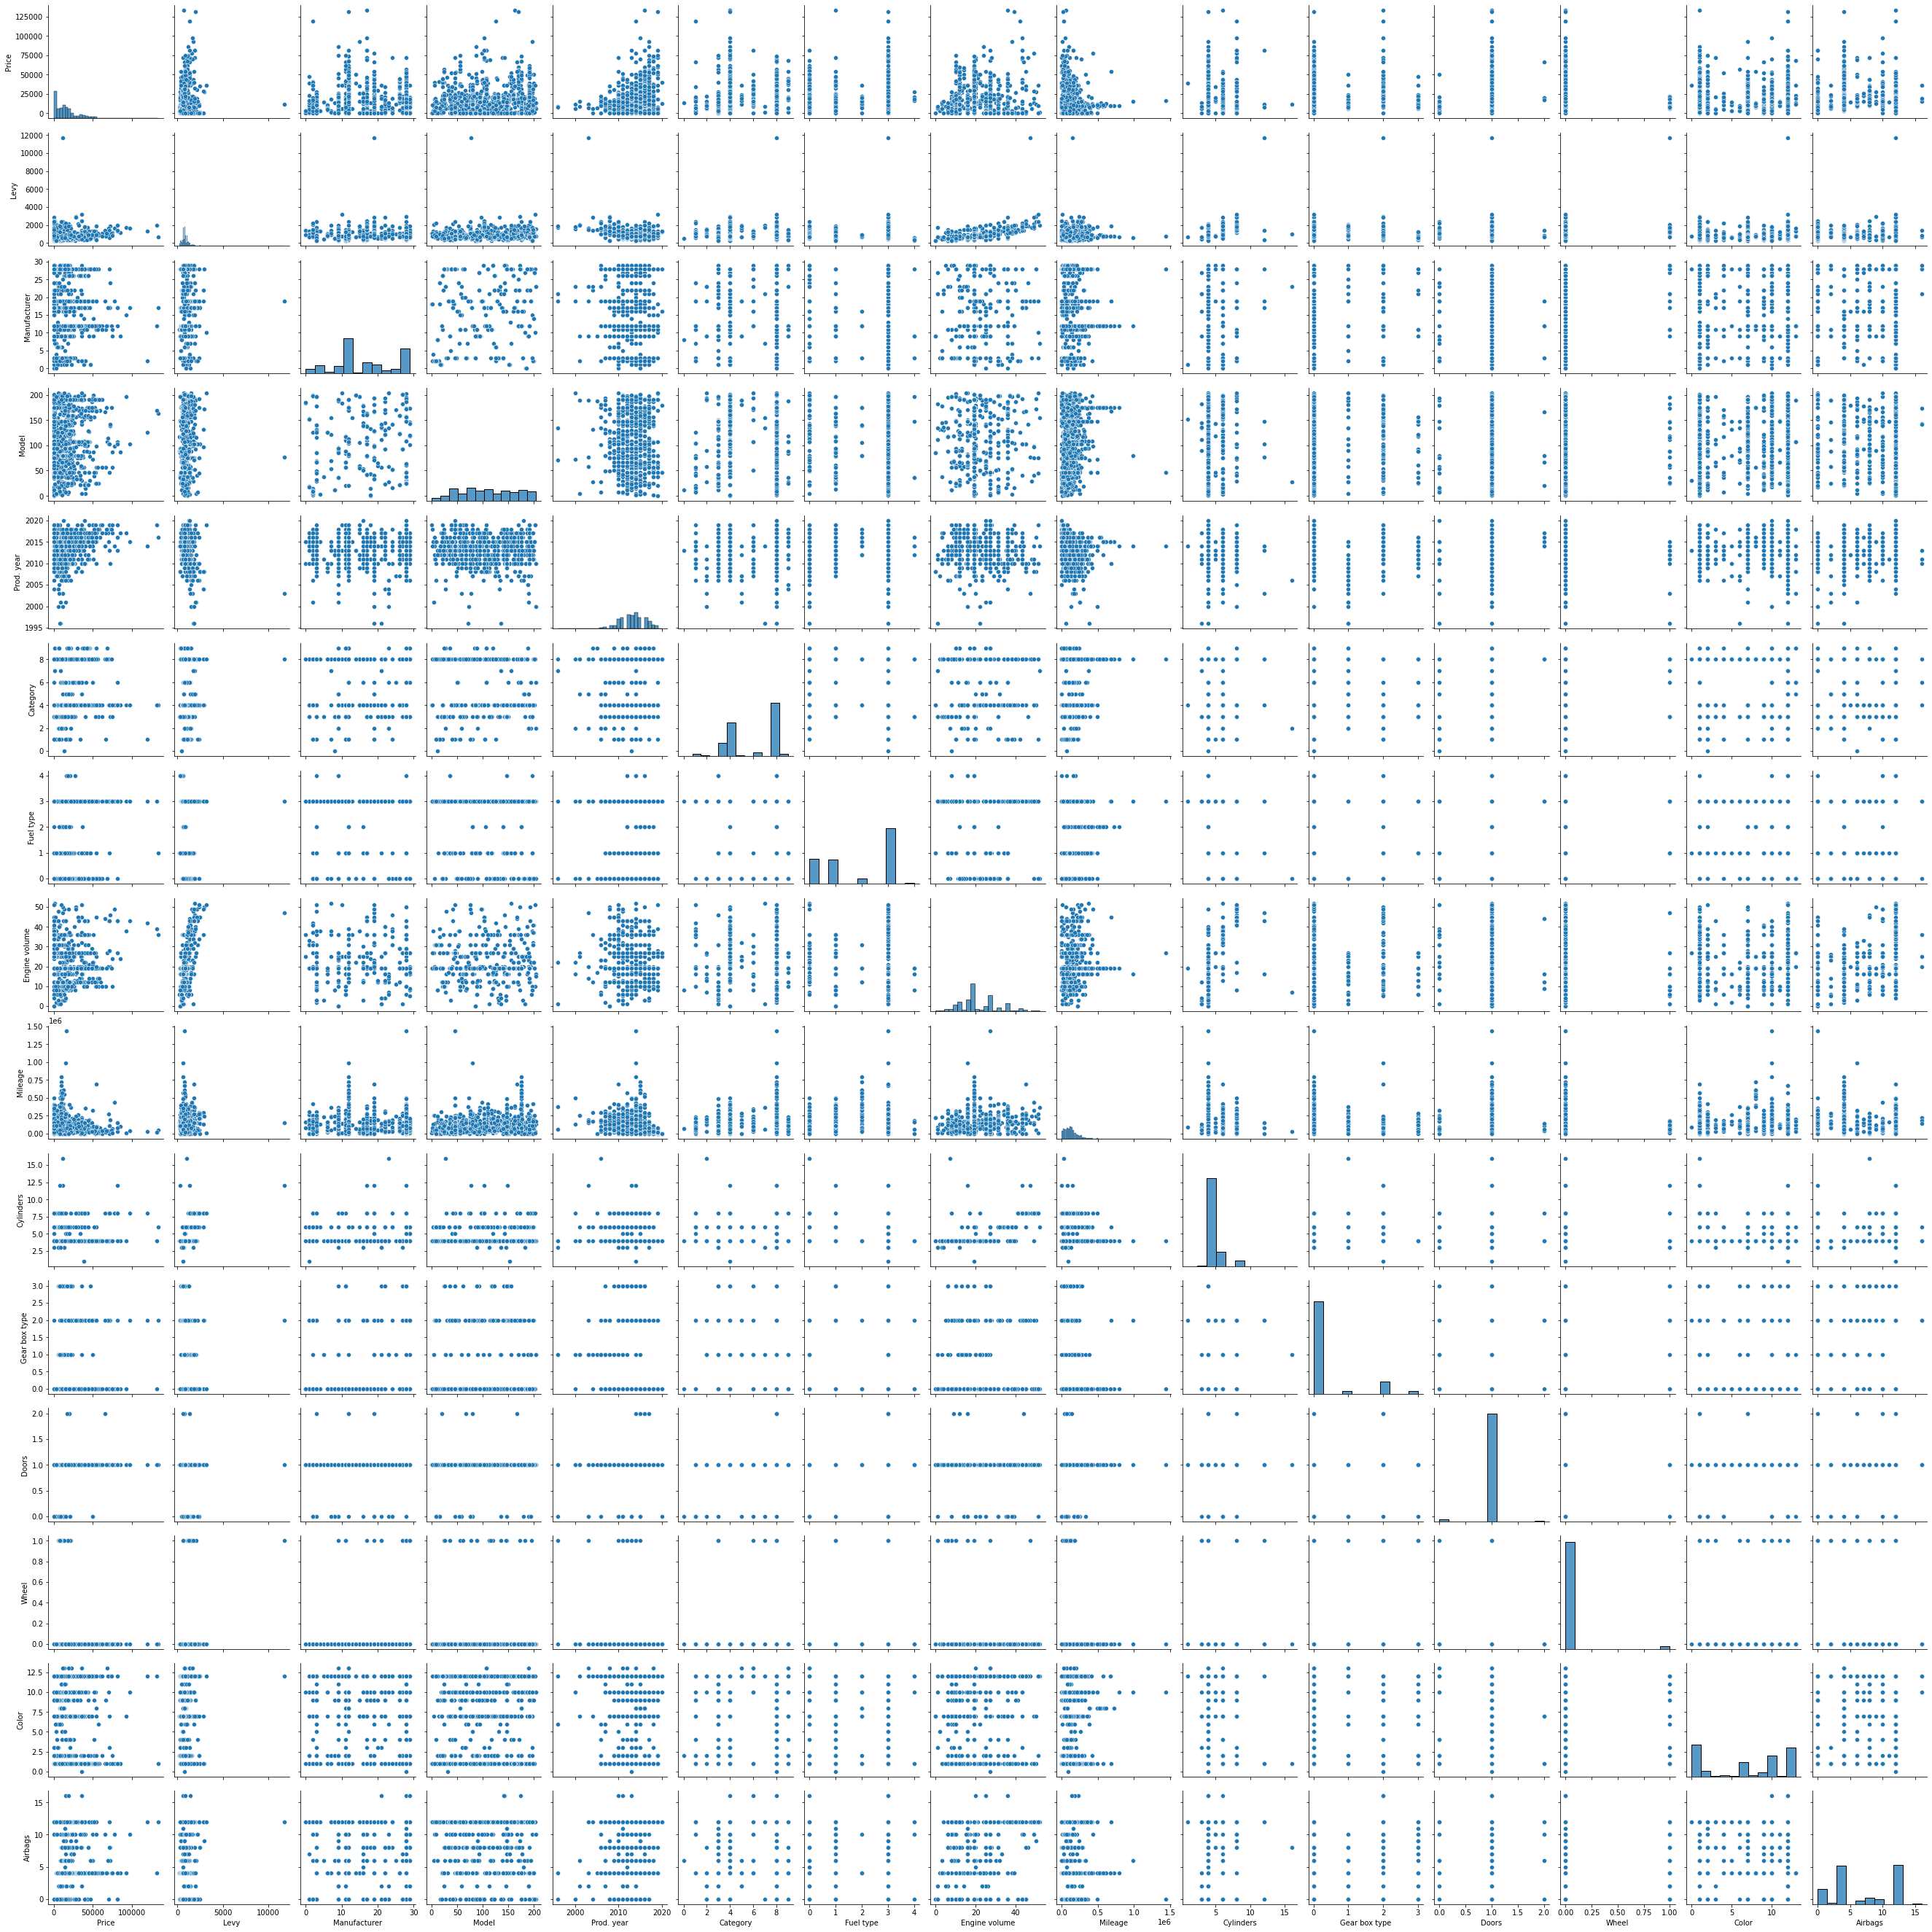

In [63]:
sns.pairplot(data)

In [ ]:
####There are alot of outliers, working on this to remove

In [64]:
data.describe()

Price          Levy  Manufacturer        Model   Prod. year  \
count    1000.000000   1000.000000   1000.000000  1000.000000  1000.000000   
mean    17255.576000    907.816000     16.111000   109.113000  2013.170000   
std     17542.158286    538.623856      8.402457    53.228033     3.077429   
min         6.000000    247.000000      0.000000     0.000000  1996.000000   
25%      3763.000000    639.000000     11.000000    67.000000  2011.000000   
50%     13485.000000    779.500000     12.000000   104.000000  2013.000000   
75%     22693.000000   1058.000000     26.000000   159.000000  2015.000000   
max    133284.000000  11714.000000     29.000000   204.000000  2020.000000   

          Category    Fuel type  Engine volume       Mileage    Cylinders  \
count  1000.000000  1000.000000    1000.000000  1.000000e+03  1000.000000   
mean      5.916000     1.848000      21.780000  1.384219e+05     4.510000   
std       2.264083     1.269057       9.844415  1.156380e+05     1.215474   
min       0.000000     0.000000       0.000000  0.000000e+00     1.000000   
25%       4.000000     1.000000      16.000000  6.591850e+04     4.000000   
50%       8.000000     3.000000      19.000000  1.205520e+05     4.000000   
75%       8.000000     3.000000      27.000000  1.756672e+05     4.000000   
max       9.000000     4.000000      52.000000  1.440000e+06    16.000000   

       Gear box type        Doors        Wheel        Color      Airbags  
count    1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean        0.330000     0.987000     0.028000     6.928000     6.928000  
std         0.779556     0.144402     0.165055     4.536231     4.455184  
min         0.000000     0.000000     0.000000     0.000000     0.000000  
25%         0.000000     1.000000     0.000000     1.000000     4.000000  
50%         0.000000     1.000000     0.000000     8.000000     6.000000  
75%         0.000000     1.000000     0.000000    12.000000    12.000000  
max         3.000000     2.000000     1.000000    13.000000    16.000000

In [65]:
np.var(data)

Price            3.074196e+08
Levy             2.898255e+05
Manufacturer     7.053068e+01
Model            2.830390e+03
Prod. year       9.461100e+00
Category         5.120944e+00
Fuel type        1.608896e+00
Engine volume    9.681560e+01
Mileage          1.335877e+10
Cylinders        1.475900e+00
Gear box type    6.071000e-01
Doors            2.083100e-02
Wheel            2.721600e-02
Color            2.055682e+01
Airbags          1.982882e+01
dtype: float64

In [102]:
data_out = data.copy()
data_out.shape

(1000, 15)

In [103]:
data_out.head()

Price  Levy  Manufacturer  Model  Prod. year  Category  Fuel type  \
0  13328.0  1399            17    163        2010         4          1   
1  16621.0  1018             3     85        2011         4          3   
3   3607.0   862             9     86        2011         4          1   
4  11726.0   446            11     88        2014         3          3   
5  39493.0   891            12    169        2016         4          0   

   Engine volume  Mileage  Cylinders  Gear box type  Doors  Wheel  Color  \
0             36   186005        6.0              0      1      0     10   
1             31   192000        6.0              2      1      0      1   
3             27   168966        4.0              0      1      0     12   
4              6    91901        4.0              0      1      0     10   
5             19   160931        4.0              0      1      0     12   

   Airbags  
0       12  
1        8  
3        0  
4        4  
5        4

In [104]:
#removing outlier using zscore
from scipy import stats

In [105]:
data_zscore = stats.zscore(data_out)

In [106]:
pd.DataFrame(data_zscore)

0         1         2         3         4         5         6  \
0   -0.224006  0.912380  0.105855  1.012887 -1.030596 -0.846682 -0.668547   
1   -0.036192  0.204668 -1.561158 -0.453240 -0.705487 -0.846682  0.908215   
2   -0.778434 -0.085104 -0.846724 -0.434443 -0.705487 -0.846682 -0.668547   
3   -0.315374 -0.857829 -0.608579 -0.396850  0.269841 -1.288583  0.908215   
4    1.268290 -0.031236 -0.489506  1.125666  0.920059 -0.846682 -1.456928   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.192799 -0.497471 -0.489506  1.539188 -0.055269 -0.846682 -1.456928   
996  0.464624 -0.291288 -0.013217  1.276038 -0.055269 -0.846682  0.908215   
997  0.151621 -0.031236 -0.489506  1.238445  0.920059  0.920922  0.119834   
998  0.267913 -0.031236 -0.489506 -0.509629  0.920059  0.920922  0.908215   
999  0.089054  1.820704  0.344000  1.351224 -2.005923 -0.404781 -1.456928   

            7         8         9        10        11        12        13  \
0    1.445197  0.411689  1.226472 -0.423530  0.090072 -0.169725  0.677553   
1    0.937040  0.463558  1.226472  2.143317  0.090072 -0.169725 -1.307466   
2    0.530515  0.264268 -0.419799 -0.423530  0.090072 -0.169725  1.118668   
3   -1.603741 -0.402499 -0.419799 -0.423530  0.090072 -0.169725  0.677553   
4   -0.282535  0.194749 -0.419799 -0.423530  0.090072 -0.169725  1.118668   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.282535 -0.641658 -0.419799 -0.423530  0.090072 -0.169725  0.015880   
996  0.327253  0.602656 -0.419799 -0.423530  0.090072 -0.169725  0.677553   
997 -0.282535  2.357344 -0.419799 -0.423530  0.090072 -0.169725  1.118668   
998 -0.282535 -1.045352 -0.419799  2.143317  0.090072 -0.169725 -1.307466   
999  1.038672 -1.197627  1.226472  2.143317  0.090072 -0.169725  1.118668   

           14  
0    1.139019  
1    0.240739  
2   -1.555820  
3   -0.657541  
4   -0.657541  
..        ...  
995 -0.657541  
996  0.016169  
997 -0.657541  
998 -0.208401  
999 -0.208401  

[1000 rows x 15 columns]

In [107]:
cols = ['Price', 'Levy', 'Mileage']

for i in cols: 
    Q1 = data_out[i].quantile(0.25)
    Q3 = data_out[i].quantile(0.75)
    IQR = Q3 - Q1
    print(IQR)
    data_out = data_out[~((data_out[i] < (Q1 - 1.5 * IQR)) |(data_out[i] > (Q3 + 1.5 * IQR)))]
 


IndentationError: unexpected indent (<ipython-input-111-ae303e1f7a1e>, line 4)

In [112]:
data_out1 = data_out.copy()

In [113]:
Q1 = data_out1.quantile(0.25)
Q3 = data_out1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
data_out1 = data_out1[~((data_out1 < (Q1 - 1.5 * IQR)) |(data_out1 > (Q3 + 1.5 * IQR)))]

Price            17532.00
Levy               385.75
Manufacturer        15.00
Model               81.75
Prod. year           4.00
Category             4.00
Fuel type            2.00
Engine volume       11.00
Mileage          92574.00
Cylinders            0.00
Gear box type        0.00
Doors                0.00
Wheel                0.00
Color               11.00
Airbags              8.00
dtype: float64


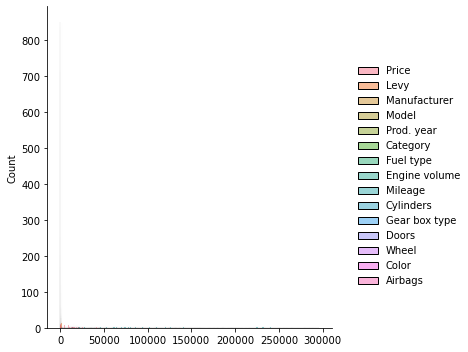

In [114]:
sns.displot(data_out1)

In [108]:
# Print the new shape of the DataFrame
print("New Shape: ", data_out.shape)

New Shape:  (850, 15)


In [109]:
data_out.head()

Price  Levy  Manufacturer  Model  Prod. year  Category  Fuel type  \
0  13328.0  1399            17    163        2010         4          1   
1  16621.0  1018             3     85        2011         4          3   
3   3607.0   862             9     86        2011         4          1   
4  11726.0   446            11     88        2014         3          3   
5  39493.0   891            12    169        2016         4          0   

   Engine volume  Mileage  Cylinders  Gear box type  Doors  Wheel  Color  \
0             36   186005        6.0              0      1      0     10   
1             31   192000        6.0              2      1      0      1   
3             27   168966        4.0              0      1      0     12   
4              6    91901        4.0              0      1      0     10   
5             19   160931        4.0              0      1      0     12   

   Airbags  
0       12  
1        8  
3        0  
4        4  
5        4

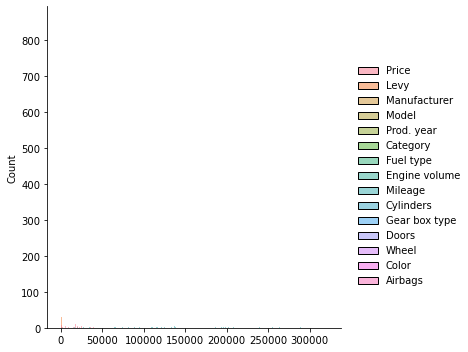

In [110]:
sns.displot(data_out)

In [ ]:
sns.pairplot(data_out)

In [ ]:
sns.boxplot(data_out['Mileage'])

In [ ]:
sns.